Epoch: 0
Output at hidden layer:
[[0.549834  0.7109495]]
Output at output layer:
[[0.52274144]]
Error at output layer:
[[0.47725856]]
Error at hidden layer:
[[0.04762713 0.01190678]]
Updated weights:
Weights input to hidden:
[[ 0.6        -0.3       ]
 [-0.09882115  0.40024468]]
Biases at hidden layer:
[[0.30117885 0.50024468]]
Weights hidden to output:
[[0.40654675]
 [0.10846512]]
Biases at output layer:
[[-0.18809322]]


Epoch: 1
Output at hidden layer:
[[0.5504175  0.71105006]]
Output at output layer:
[[0.52817048]]
Error at output layer:
[[0.47182952]]
Error at hidden layer:
[[0.04780297 0.01275365]]
Updated weights:
Weights input to hidden:
[[ 0.6        -0.3       ]
 [-0.09763823  0.40050672]]
Biases at hidden layer:
[[0.30236177 0.50050672]]
Weights hidden to output:
[[0.41301872]
 [0.11682586]]
Biases at output layer:
[[-0.17633492]]


Epoch: 2
Output at hidden layer:
[[0.55100288 0.71115772]]
Output at output layer:
[[0.5335299]]
Error at output layer:
[[0.4664701]]
Error at h

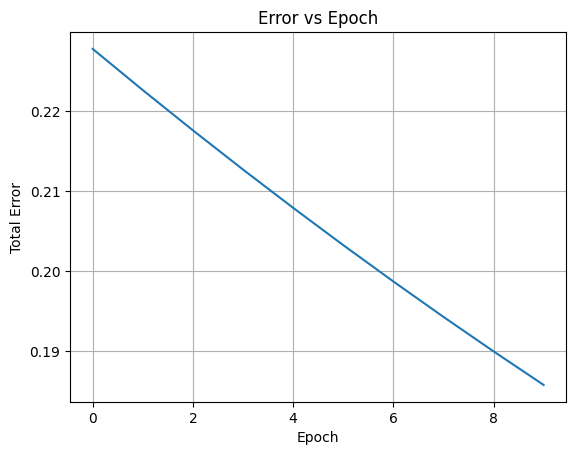

In [12]:
# 60004210153
# PRERAK PATEL
# C21
import numpy as np
import matplotlib.pyplot as plt

def initialize_network(n_inputs, n_hidden, n_output):
    input_layer_weights = np.array([[0.6, -0.3], [-0.1, 0.4]])
    hidden_layer_weights = np.array([[0.4], [0.1]])
    input_layer_bias = np.array([[0.3, 0.5]])
    hidden_layer_bias = np.array([[-0.2]])

    return input_layer_weights, hidden_layer_weights, input_layer_bias, hidden_layer_bias

def train_network(input_data, target_data, input_layer_weights, hidden_layer_weights,
                  input_layer_bias, hidden_layer_bias, learning_rate, epochs):
    errors = []

    for epoch in range(epochs):
        total_error = 0

        for i in range(len(input_data)):
            x = input_data[i]
            t = target_data[i]

            hidden_layer_input = np.dot(x, input_layer_weights) + input_layer_bias
            hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))

            output_layer_input = np.dot(hidden_layer_output, hidden_layer_weights) + hidden_layer_bias
            output_layer_output = 1 / (1 + np.exp(-output_layer_input))

            output_error = t - output_layer_output
            total_error += np.sum(output_error**2)

            output_delta = output_error * output_layer_output * (1 - output_layer_output)
            hidden_error = output_delta.dot(hidden_layer_weights.T)
            hidden_delta = hidden_error * hidden_layer_output * (1 - hidden_layer_output)

            hidden_layer_weights += learning_rate * hidden_layer_output.reshape(-1, 1) * output_delta
            input_layer_weights += learning_rate * x.reshape(-1, 1) * hidden_delta

            hidden_layer_bias += learning_rate * output_delta
            input_layer_bias += learning_rate * hidden_delta

        errors.append(total_error)

        if epoch % 1 == 0:
            print(f"Epoch: {epoch}")
            print("Output at hidden layer:")
            print(hidden_layer_output)
            print("Output at output layer:")
            print(output_layer_output)
            print("Error at output layer:")
            print(output_error)
            print("Error at hidden layer:")
            print(hidden_error)
            print("Updated weights:")
            print("Weights input to hidden:")
            print(input_layer_weights)
            print("Biases at hidden layer:")
            print(input_layer_bias)
            print("Weights hidden to output:")
            print(hidden_layer_weights)
            print("Biases at output layer:")
            print(hidden_layer_bias)
            print("\n")

    return input_layer_weights, hidden_layer_weights, input_layer_bias, hidden_layer_bias, errors

ni = 2
nhidden = 2
nout = 1
learning_rate = 0.1
epochs = 10

input_data = np.array([[0, 1]])
target_data = np.array([[1]])

input_layer_weights, hidden_layer_weights, input_layer_bias, hidden_layer_bias = initialize_network(ni, nhidden, nout)

trained_input_weights, trained_hidden_weights, trained_input_bias, trained_hidden_bias, errors = train_network(
    input_data, target_data, input_layer_weights, hidden_layer_weights, input_layer_bias, hidden_layer_bias,
    learning_rate, epochs
)

plt.plot(range(epochs), errors)
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Error vs Epoch')
plt.grid(True)
plt.show()
